In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os 



In [2]:
df = pd.read_csv('C:\\Users\\YoutaPy\\Desktop\\5\\Spine.csv')
df.head()

,PI,PT,LL,SS,PR,GS,Categories
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [3]:
df.describe(include='all')

,PI,PT,LL,SS,PR,GS,Categories
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Spondylolisthesis
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


### It seems that GS variable is scaled differently from the rest of variables.
### From the mean and median, we can tell that PI and GS are skewed.
### There are three categories with Spondylolisthesis as the most frequent one. 

In [4]:
df.dtypes

PI            float64
PT            float64
LL            float64
SS            float64
PR            float64
GS            float64
Categories     object
dtype: object

In [5]:
df.agg({"PI":['mean', 'var'], "GS":['mean','std','median']})

,PI,GS
mean,60.496653,26.296694
median,NaN,11.767934
std,NaN,37.559027
var,297.097633,NaN


In [6]:
df2 = df.groupby(df['Categories'])
df2.agg(['mean', 'std'])

PI                    PT                    LL  \
                        mean        std       mean        std       mean   
Categories                                                                 
Hernia             47.638407  10.697131  17.398795   7.016708  35.463524   
Normal             51.685244  12.368161  12.821414   6.778503  43.542605   
Spondylolisthesis  71.514224  15.109337  20.748038  11.506169  64.110108   

                                     SS                     PR             \
                         std       mean        std        mean        std   
Categories                                                                  
Hernia              9.767795  30.239612   7.555388  116.474968   9.355720   
Normal             12.361388  38.863830   9.624004  123.890834   9.014246   
Spondylolisthesis  16.397068  50.766186  12.318813  114.518810  15.579995   

                          GS             
                        mean        std  
Categories                               
Hernia              2.480251   5.531177  
Normal              2.186572   6.307483  
Spondylolisthesis  51.896687  40.108030


<h5>It is noticeable that for all variables except PR, the mean and standard deviation 
for Spondylolisthesis patients are higher than those for other categories. For patients
with Hernia, most of variables tend to take smaller values</h5>

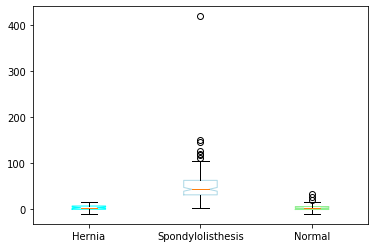

In [7]:
list_=[df['GS'].loc[df['Categories']==x] for x in df['Categories'].unique()]


box = plt.boxplot(list_, notch=True, labels=df["Categories"].unique())
colors = ['cyan', 'lightblue', 'lightgreen'] 

for patch, color in zip(box['boxes'], colors):
    patch.set_color(color) 

###### The variable GS is an appropriate variable to separate Spondylolisthesis from the rest of categories. The higher average and larger standard deviation are obvious. An extreme value on this variable is also observable around 400. 

In [8]:
X = df.iloc[:,0:6]
X = scale(X)
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
W = pca.components_.T
pd.DataFrame(W[:,:3],index=df.columns[:-1],columns=['PC1','PC2','PC3']) 


,PC1,PC2,PC3
PI,0.535142,-0.002194,-0.096069
PT,0.323585,0.527545,-0.648701
LL,0.457970,0.092875,0.152338
SS,0.445906,-0.396157,0.360313
PR,-0.143497,0.727756,0.585991
GS,0.423978,0.162777,0.271184


##### The first PC gives a contrast between the average of PI, PT, LL, SS and GS against PR. The second PC gives a contrast between the average of PR, GS, PT, LL against SS. PC3 provides a contrast between the average of PI and PT against the average of LL, SS, PR and GS


In [13]:
pd.DataFrame(pca.explained_variance_ratio_.cumsum(),index=np.arange(X.shape[1])+1,columns=['Explained Variability'])

,Explained Variability
1,0.540964
2,0.740061
3,0.866909
4,0.945664
5,1.000000
6,1.000000


#### Obviously, the first two components explain about 74% of the variability. So, we can work with these two components.

<BarContainer object of 6 artists>

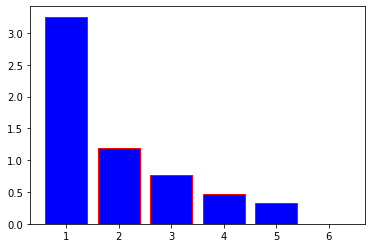

In [15]:
plt.bar(np.arange(1,X.shape[1]+1),pca.explained_variance_,color="blue",edgecolor="Red") 